In [5]:
%matplotlib inline
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

set_matplotlib_formats('pdf', 'png')
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

<h1>Linear models for classification</h1>


C:\Users\medialab\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\medialab\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\medialab\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


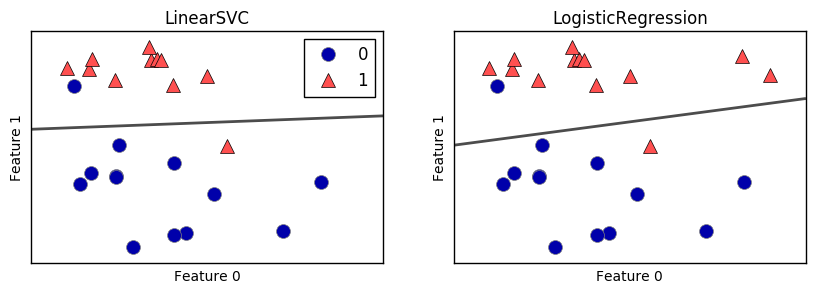

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C,

    1. Higher values of C correspond to less regularization. In other words, when using a high value of the parameter C, LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C, the model put more emphasis on finding a coefficient vector w that is close to zero.
    
    2. There is another interesting intuition of how the parameter C acts. Using low values of C will cause the algorithms try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly. Here is an illustration using LinearSVC

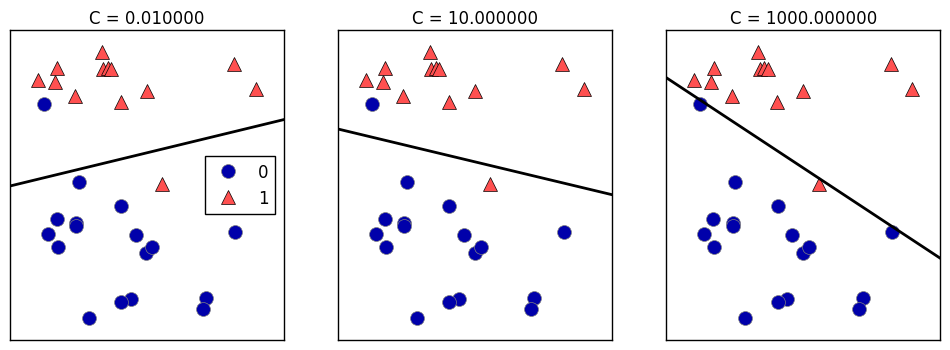

In [7]:
mglearn.plots.plot_linear_svc_regularization()

On the left hand side, we have a very small C corresponding to a lot of regularization. Most of the blue points are at the top, and most of the red points are at the bottom. The strongly regularized model chooses a relatively horizontal line, misclassifying two points.
In the center plot, C is slightly higher, and the model focuses more on the two misclassified samples, tilting the decision boundary. Finally, on the right hand side, a very high value of C in the model tilts the decision boundary a lot, now correctly classifying all red points. One of the blue points is still misclassified, as it is not possible to correctly classify all points in this dataset using a straight line. The model illustrated on the right hand side tries hard to correctly classify all points, but might not capture the overall layout of the classes well. In other words, this model is likely overfitting.

In [10]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [11]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [12]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


As LogisticRegression applies an L2 regularization by default, the result looks similar to Ridge in Figure ridge_coefficients. Stronger regularization pushes coefficients more and more towards zero, though coefficients never become exactly zero.

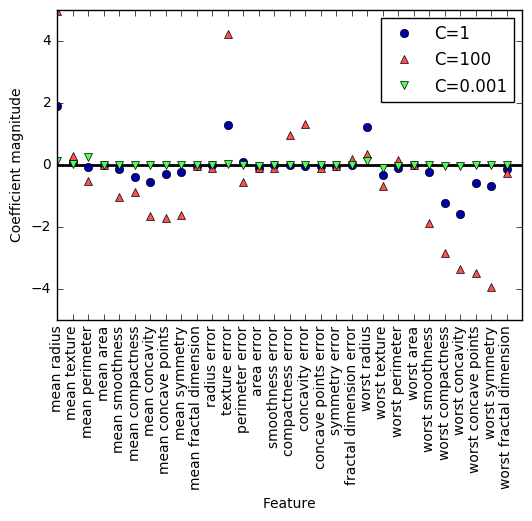

In [13]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

If we desire a more interpretable model, using L1 regularization might help, as it limits the model to only using a few features. Here is the coefficient plot and classification accuracies for L1 regularization:

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


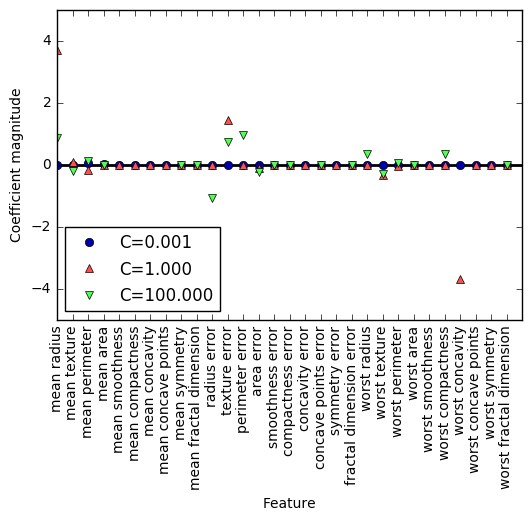

In [14]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

<h2>Linear models for multiclass classification</h2>

Many linear classification models are binary models, and don’t extend naturally to the multi-class case (with the exception of Logistic regression).

A common technique to extend a binary classification algorithm to a multi-class classification algorithm is the one-vs-rest approach.

In the one-vs-rest approach, a binary model is learned for each class, which tries to separate this class from all of the other classes, resulting in as many binary models as there are classes.

To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins” and this class label is returned as prediction.

<b>The mathematics behind logistic regression are somewhat different from the one-vs-rest approach, but they also result in one coefficient vector and intercept per class, and the same method of making a prediction is applied.
Let’s apply the one-vs-rest method to a simple three-class classification dataset.
We use a two-dimensional dataset, where each class is given by data sampled from a Gaussian distribution.</b>

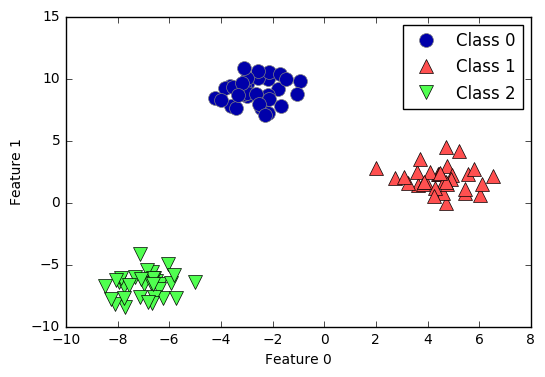

In [15]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [16]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


We see that the shape of the coef_ is (3, 2), meaning that each row of coef_ contains the coefficient vector for one of the three classes. Each row has two entries, corresponding to the two features in the dataset.

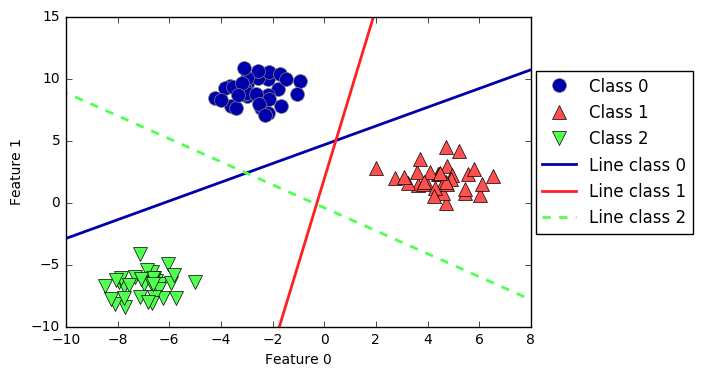

In [17]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

The red line shows the decision boundary for the binary classifier for the red class, and so on.
You can see that all the red points in the training data are below the red line, which means they are on the “red” side of this binary classifier. The red points are left of the green line, which means they are classified as “rest” by the binary classifier for the green class. The red points are below the blue line, which means the binary classifier for the blue class also classifies them as “rest”. Therefore, any point in this area will be classified as red by the final classifier (W^T.X + B  of the red classifier is greater than zero, while it is smaller than zero for the other two classes).

<h2><span style="color:red">But what about the triangle in the middle of the plot? All three binary classifiers classify points there as “rest”. Which class would a point there be assigned to? </span></h2>

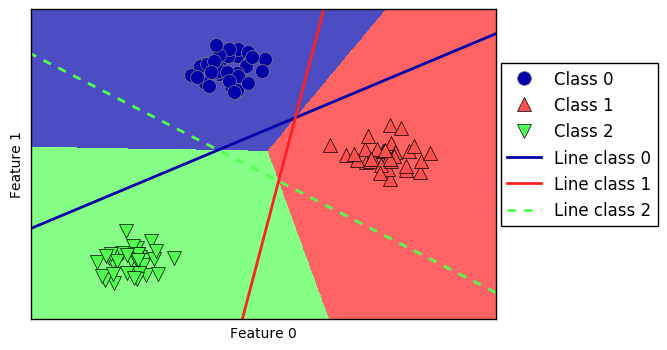

In [18]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<h3>Strengths, weaknesses and parameters</h3>
1. The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression. Large alpha or small C mean simple models. 
2. In particular for the regression models, tuning this parameter is quite important. Usually C and alpha are searched for on a logarithmic scale.
3. The other decision you have to make is whether you want to use L1 regularization or L2 regularization. If you assume that only few of your features are actually important, you should use L1. Otherwise, you should default to L2.
4. Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. If your data consists of hundreds of thousands or millions of samples, you might want to investigate SGDClassifier and SGDRegressor, which implement even more scalable versions of the linear models described above.
5. Linear models often perform well when the number of features is large compared to the number of samples. They are also often used on very large datasets, simply because other models are not feasible to train. However, on smaller dataset, other models might yield better generalization performance.

<h3>Kernelized Support Vector Machines</h3>
Linear Models and Non-linear Features

1. Kernelized support vector machines (often just referred to as SVMs) are an extension that allows for more complex models which are not defined simply by hyperplanes in the input space. 
2. Linear models can be quite limiting in low-dimensional spaces, as lines or hyperplanes have limited flexibility.
3. One way to make a linear model more flexible is by adding more features, for example by adding interactions or polynomials of the input features.

Let’s look at the synthetic dataset we used in Figure below:

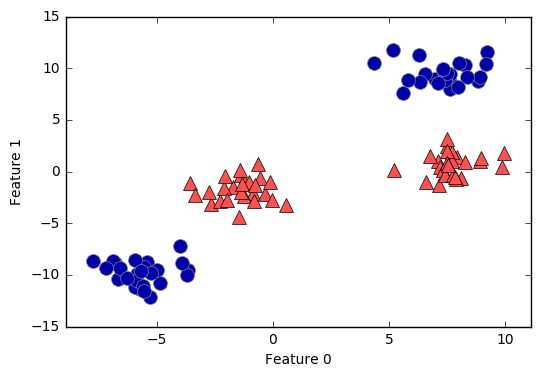

In [19]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

A linear model for classification can only separate points using a line, and will not be able to do a very good job on this dataset:

C:\Users\medialab\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\medialab\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


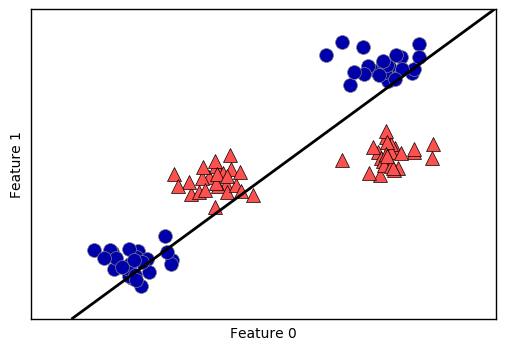

In [20]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<b>Now, let’s expand the set of input features, say by also adding (feature2)^2, the square of the second feature, as a new feature. Instead of representing each data point as a two-dimensional point (feature1, feature2), we now represent it as a three-dimensional point (feature1, feature2, (feature2)^2)</b>

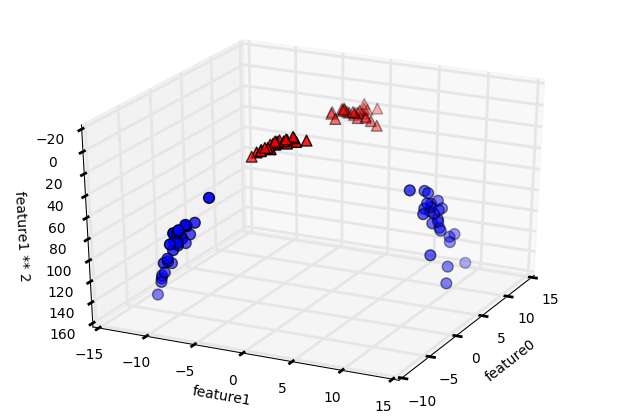

In [21]:
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In the new, three-dimensional representation of the data, it is now indeed possible to separate the red and the blue points
using a linear model, a plane in three dimensions. We can confirm this by fitting a linear model to the augmented data:

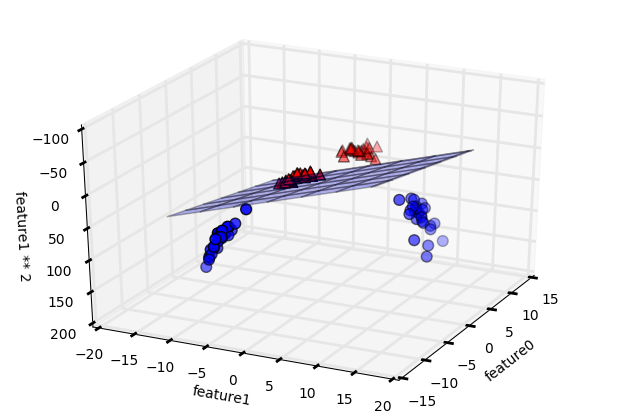

In [22]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

As a function of the original features, the linear SVM model is not actually linear anymore. It is not a line, but more of an ellipse.

C:\Users\medialab\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\medialab\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


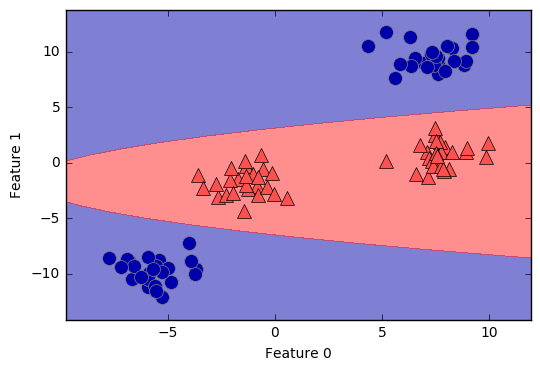

In [23]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### The Kernel Trick
1. The lesson here is that adding non-linear features to the representation of our data can make linear models much more powerful.
2. However, often we don’t know which features to add, and adding many features (like all possible interactions in a 100 dimensional feature space) might make computation very expensive.
3. There is a clever mathematical trick that allows us to learn a classifier in a higher dimensional space without actually computing the new, possibly very large representation. This trick is known as the kernel trick.
4. The kernel trick works by directly computing the distance (more precisely, the scalar products) of the data points for the expanded feature representation, without ever actually computing the expansion.


There are two ways to map your data into a higher dimensional space that are commonly used with support vector machines:
1. The polynomial kernel, which computes all possible polynomials up to a certain degree of the original features (like feature1 ** 2 * feature2 ** 5), 
2. and the radial basis function (rbf) kernel, also known as Gaussian kernel.

The Gaussian kernel is a bit harder to explain, as it corresponds to an infinite dimensional feature space. Don’t worry. You can still use SVMs without trying to imagine infinite dimensional feature spaces. In practice, how a SVM with an rbf kernel makes a decision can be summarized quite easily.

C:\Users\medialab\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\medialab\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


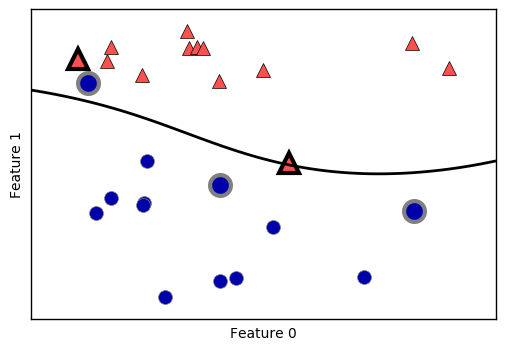

In [24]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

<h3>Tuning SVM Parameters</h3>

C:\Users\medialab\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\medialab\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


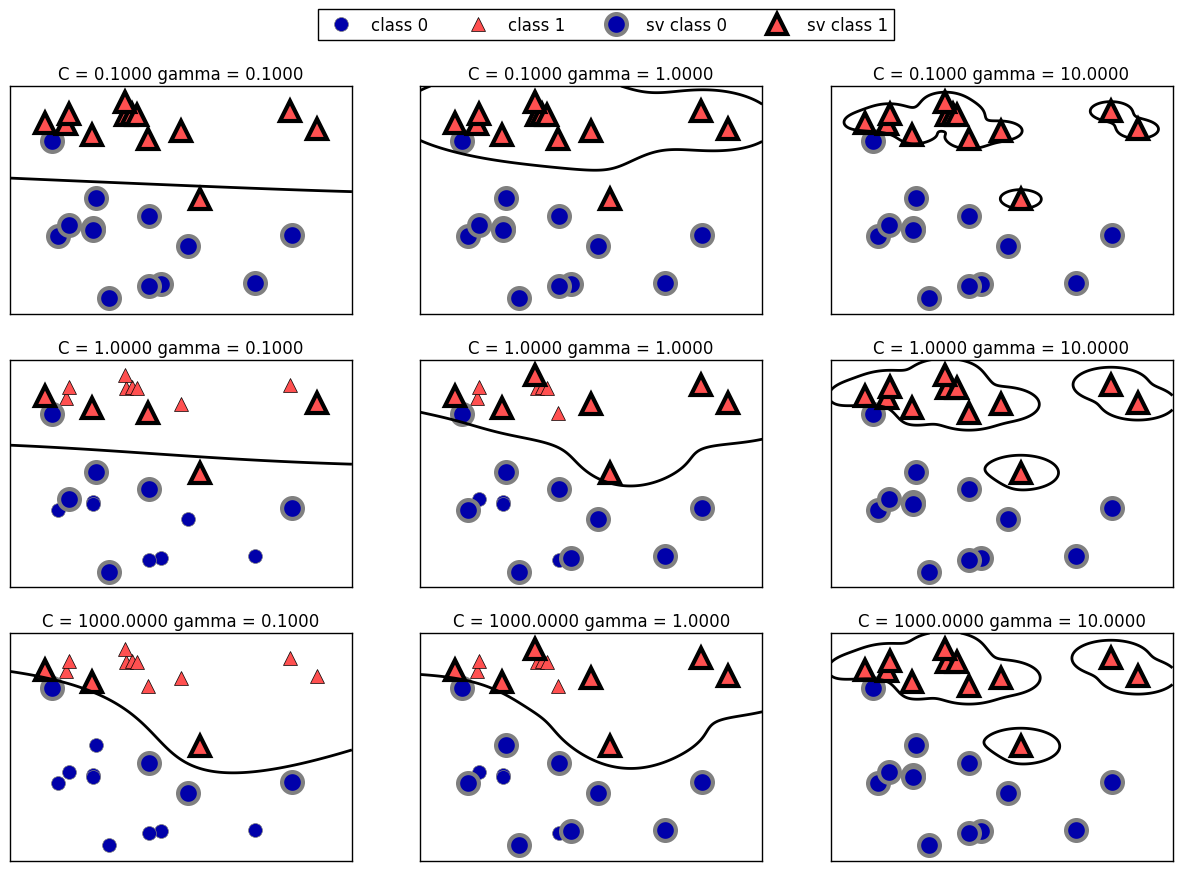

In [39]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

<h2> SVM on IRIS Dataset </h2>

C:\Users\medialab\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


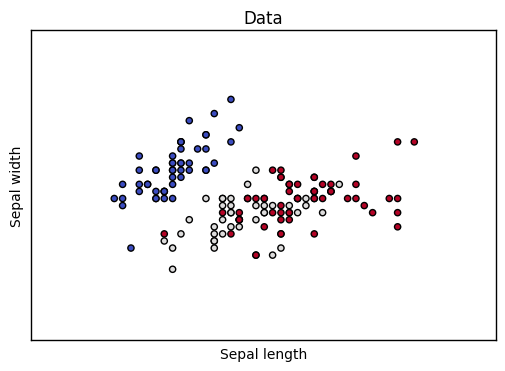

In [41]:
import matplotlib
matplotlib.use('GTKAgg')
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
 
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
h = .02  # step size in the mesh
 
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Data')
plt.show()

C:\Users\medialab\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\medialab\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


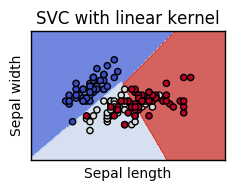

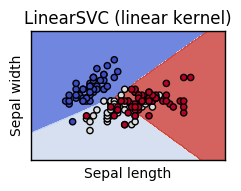

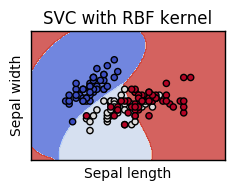

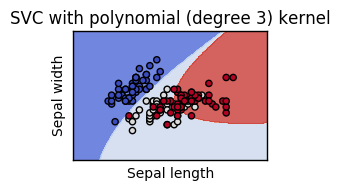

In [42]:
h = .02  # step size in the mesh
 
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)
 
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
 
# title for the plots
titles = ['SVC with linear kernel',
'LinearSVC (linear kernel)',
'SVC with RBF kernel',
'SVC with polynomial (degree 3) kernel']
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
# Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
    plt.show()

<h2> OR function using Perceptron </h2>

In [31]:
from random import choice
from numpy import array, dot, random

Then let's create the step function

In [32]:
unit_step = lambda x: 0 if x < 0 else 1

Next we need to map the possible input to the expected output. 
1. The first two entries of the NumPy array in each tuple are the two input values. 
2. The second element of the tuple is the expected result. 
3. And the third entry of the array is a "dummy" input (also called the bias) which is needed to move the threshold (also known as the decision boundary) up or down as needed by the step function. Its value is always 1, so that its influence on the result can be controlled by its weight.

In [34]:
training_data = [
    (array([0,0,1]), 0),
    (array([0,1,1]), 1),
    (array([1,0,1]), 1),
    (array([1,1,1]), 1),
]

Next we'll choose three random numbers between 0 and 1 as the initial weights:

In [ ]:
w = random.rand(3)

Now on to some variable initializations. The errors list is only used to store the error values so that they can be plotted later on. If you don't want to do any plotting, you can just leave it away. The eta variable controls the learning rate. And n specifies the number of learning iterations.

First we get a random input set from the training data. Then we calculate the dot product (sometimes also called scalar product or inner product) of the input and weight vectors. This is our (scalar) result, which we can compare to the expected value. If the expected value is bigger, we need to increase the weights, if it's smaller, we need to decrease them. This correction factor is calculated in the last line, where the error is multiplied with the learning rate (eta) and the input vector (x). It is then added to the weights vector, in order to improve the results in the next iteration.

In [35]:
errors = []
eta = 0.2
n = 100

In order to find the ideal values for the weights w, we try to reduce the error magnitude to zero. In this simple case n = 100 iterations are enough; for a bigger and possibly "noisier" set of input data much larger numbers should be used.

In [36]:
for i in range(n):
    x, expected = choice(training_data)
    result = dot(w, x)
    error = expected - unit_step(result)
    errors.append(error)
    w += eta * error * x

<h3> Start Training </h3>

In [38]:
for x, _ in training_data:
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result)))

[0 0]: -0.18823976343154858 -> 0
[0 1]: 0.17818714113547235 -> 1
[1 0]: 0.1779794808596969 -> 1
[1 1]: 0.5444063854267178 -> 1
